In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

df=pd.read_table(r'D:\Python\Python_Project\NJU\Single Modality\data\MVSA\MVSA_Single\labelResultAll.txt')
df.head(5)
print(df.columns)

Index(['ID', 'text,image'], dtype='object')


In [2]:
df['text,image'].value_counts()
'''
约定positive 0 neutral 1 negative 2
'''

'\n约定positive 0 neutral 1 negative 2\n'

In [3]:
text_list=[]
image_list=[]
for i in range(len(df)):
    index1=None
    index2=None
    if(df['text,image'][i][:3]=='neu'):
        index1='neutral'
        if(df['text,image'][i][8:]=='positive'):
            index2=0
        elif(df['text,image'][i][8:]=='neutral'):
            index2=1
        elif(df['text,image'][i][8:]=='negative'):
            index2=2

    elif(df['text,image'][i][:3]=='neg'):
        index1='negative'
        if(df['text,image'][i][9:]=='positive'):
            index2=0
        elif(df['text,image'][i][9:]=='neutral'):
            index2=1
        elif(df['text,image'][i][9:]=='negative'):
            index2=2

    elif(df['text,image'][i][:3]=='pos'):
        index1='positive'
        if(df['text,image'][i][9:]=='positive'):
            index2=0
        elif(df['text,image'][i][9:]=='neutral'):
            index2=1
        elif(df['text,image'][i][9:]=='negative'):
            index2=2

    text_list.append(index1)
    image_list.append(index2)

In [4]:
df['text_label']=text_list
df['image_label']=image_list

In [5]:
# 下载 all-nltk
nltk.download()
stop_words = stopwords.words("english")
wordnet = WordNetLemmatizer()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [6]:
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x=re.sub(r'\\t|\\n','',x)
  x=re.sub(r'rt ','',x)
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  # x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

x='showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml'
x = x.lower()
x = ' '.join([word for word in x.split(' ') if word not in stop_words])
print(x)
text_preproc(x)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


'showing info '

In [7]:
words_list=[]
index_list=[]
from nltk import word_tokenize
index=r'D:\Python\Python_Project\NJU\Single Modality\data\MVSA\MVSA_Single\data\1.txt'
for i in range(len(df)):
    index=r'D:\Python\Python_Project\NJU\Single Modality\data\MVSA\MVSA_Single\data\1.txt'
    index=index[:-5]+str(df['ID'][i])+'.txt'
    with open(index, "rb") as f:  # 打开文件
        data = f.read()  # 读取文件
        data_2=str(data)[2:][:-1]
        words=text_preproc(data_2)
        # words = word_tokenize(words)
        if(len(words)==0):
            index_list.append(i)
        words_list.append(words)
df['words']=words_list

In [8]:
df2=df.drop(index_list)
df2

,ID,"text,image",text_label,image_label,words
0,1,"neutral,positive",neutral,0,feel today legday jelly aching gym r
1,2,"neutral,positive",neutral,0,grattis min griskulting va bara tvungen oki s ...
2,3,"neutral,positive",neutral,0,moment found favourite tv character profoundl...
3,4,"positive,positive",positive,0,escoyoung energetic team pride offering highe...
4,5,"positive,positive",positive,0,went ssc today movie star rep deaf got meet e...
...,...,...,...,...,...
4864,5125,"neutral,positive",neutral,0,
4865,5126,"positive,neutral",positive,1,yes sinful food freefrom glutenfree sugarfree
4866,5127,"positive,positive",positive,0,disney lies every day good hair day yeah right
4867,5128,"neutral,positive",neutral,0,two days submit apps


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df2.words,df2.text_label,random_state=2,test_size=0.25,shuffle=True)
x_valid,x_test,y_valid,y_test=train_test_split(x_test,y_test,random_state=2,test_size=0.75,shuffle=True)

In [10]:
print(len(x_valid),len(x_train),len(x_test))
df2_1=pd.DataFrame({'words':x_train.values,'label':y_train.values})
df2_1.to_csv('train.csv')
df2_2=pd.DataFrame({'words':x_valid.values,'label':y_valid.values})
df2_2.to_csv('valid.csv')
df2_3=pd.DataFrame({'words':x_test.values,'label':y_test.values})
df2_3.to_csv('test.csv')

304 3651 914


In [11]:
df2_2['label'].value_counts()

neutral     131
positive     98
negative     75
Name: label, dtype: int64

In [12]:
'''
torchtext加载自己的数据集
'''
# def json_file(x_train,filename='train.json'):
#     dict_list=[]
#     for i in range(len(x_train)):
#         dict={'words':x_train.values[i]}
#         with open(filename,'a') as f:
#             json.dump(dict,f,indent=5)
#
#     print(filename,'write successfully!')
# json_file(x_train,'train.json')
# json_file(x_valid,'valid.json')
# json_file(x_test,'test.json')

NameError: name 'json' is not defined

In [13]:
from torchtext.legacy import data
from torchtext.legacy import datasets
WORDS=data.Field()
LABEL=data.LabelField()
fields={'words':('w',WORDS),'label':('l',LABEL)}
'''
csv文件里面直接就是str就OK！
'''
train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path=r'D:\Python\Python_Project\NJU\Single Modality\Dataprocessing',
                                        train = 'train.csv',
                                        validation = 'valid.csv',
                                        test = 'test.csv',
                                        format = 'csv',
                                        fields = fields,

)
#Notice how the field names (n, p and s) match up with what was defined in the fields dictionary.
print(vars(test_data[0]))

{'w': ['forever', 'cherishing', 'great', 'selfie', 'took', 'phone', 'r'], 'l': 'positive'}


In [14]:
import torch
WORDS.build_vocab(train_data,vectors='glove.6B.100d',unk_init = torch.Tensor.normal_,max_size=25000)
LABEL.build_vocab(train_data)

In [15]:
#设置batch_size，创建迭代器iterator
BATCH_SIZE = 16
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data),sort=False,
    batch_size = BATCH_SIZE,
    device = device)

In [16]:
import torch.nn as nn
import torch.nn.functional as F
#注意output_dim的设置（2分类问题直接是1，多个类别output_dim同类别的数目相同）
class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim,
                 dropout, pad_idx):

        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        #in_channels image 3 这里处理的是text
        #out_channels filters的数量
        #kernel_size 卷积核的大小 这里使用nn.ModuleList简化代码
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1,
                                              out_channels = n_filters,
                                              kernel_size = (fs, embedding_dim))
                                    for fs in filter_sizes
                                    ])
        #上述用不同大小的卷积核进行了计算，将不同的结果映射到同一个Linear层中，因此是len(filter_sizes) * n_filters
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
    def forward(self, text):
        #text = [sent len, batch size]
        text = text.permute(1, 0)
        #text = [batch size, sent len]
        embedded = self.embedding(text)
        #embedded = [batch size, sent len, emb dim]
        #unsqueeze(1) 在1的位置进行升维操作
        embedded = embedded.unsqueeze(1)
        #embedded = [batch size, 1, sent len, emb dim]
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        #Maxpool的过程中 每个filter的输出 共有conv.shape[2]个
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        #pooled_n = [batch size, n_filters]
        cat = self.dropout(torch.cat(pooled, dim = 1))
        #cat = [batch size, n_filters * len(filter_sizes)]
        return self.fc(cat)

In [23]:
INPUT_DIM = len(WORDS.vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [2,3]
OUTPUT_DIM = len(LABEL.vocab)
DROPOUT = 0.5
PAD_IDX = WORDS.vocab.stoi[WORDS.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,081,903 trainable parameters


In [24]:
pretrained_embeddings = WORDS.vocab.vectors
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.1018, -0.1022,  0.8981,  ..., -0.6494, -0.0486, -1.4823],
        [-0.4371, -1.1208,  0.1360,  ..., -0.3431,  0.2645,  0.7502],
        [-1.0140,  0.0788,  0.4779,  ..., -0.2161,  0.8119, -0.8852],
        ...,
        [ 0.4624,  0.0663, -0.5151,  ..., -0.3431, -0.1127,  0.1836],
        [ 0.2127, -0.2794, -0.3600,  ...,  0.3544, -0.2931,  0.0051],
        [-0.0540,  0.0612,  0.5509,  ..., -0.2635, -0.3830, -1.6478]])

In [25]:
UNK_IDX = WORDS.vocab.stoi[WORDS.unk_token]
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [26]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
model = model.to(device)
criterion = criterion.to(device)

In [27]:
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    top_pred = preds.argmax(1, keepdim = True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    loss_list=[]
    count=0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        predictions = model(batch.w)
        loss = criterion(predictions, batch.l)
        acc = categorical_accuracy(predictions, batch.l)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        if(count%10==0):
                loss_list.append(loss.item())
    return epoch_loss / len(iterator), epoch_acc / len(iterator),loss_list
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    loss_list=[]
    model.eval()
    count=0
    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.w)
            loss = criterion(predictions, batch.l)
            acc = categorical_accuracy(predictions, batch.l)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            if(count%10==0):
                loss_list.append(loss.item())
    return epoch_loss / len(iterator), epoch_acc / len(iterator),loss_list
import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [28]:
N_EPOCHS = 70
best_valid_loss = float('inf')
valid_loss_list=[]
valid_acc_list=[]
train_loss_list=[]
train_acc_list=[]
for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss, train_acc,epoch_train_list = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc ,epoch_test_list= evaluate(model, train_iterator, criterion)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut5-model.pt')

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 3s
	Train Loss: 0.967 | Train Acc: 52.70%
	 Val. Loss: 0.727 |  Val. Acc: 72.92%
Epoch: 02 | Epoch Time: 0m 1s
	Train Loss: 0.720 | Train Acc: 69.14%
	 Val. Loss: 0.499 |  Val. Acc: 83.60%
Epoch: 03 | Epoch Time: 0m 1s
	Train Loss: 0.541 | Train Acc: 78.87%
	 Val. Loss: 0.351 |  Val. Acc: 89.44%
Epoch: 04 | Epoch Time: 0m 1s
	Train Loss: 0.402 | Train Acc: 85.04%
	 Val. Loss: 0.225 |  Val. Acc: 94.10%
Epoch: 05 | Epoch Time: 0m 1s
	Train Loss: 0.281 | Train Acc: 90.56%
	 Val. Loss: 0.142 |  Val. Acc: 96.59%
Epoch: 06 | Epoch Time: 0m 2s
	Train Loss: 0.200 | Train Acc: 93.61%
	 Val. Loss: 0.091 |  Val. Acc: 98.01%
Epoch: 07 | Epoch Time: 0m 2s
	Train Loss: 0.153 | Train Acc: 95.36%
	 Val. Loss: 0.075 |  Val. Acc: 97.95%
Epoch: 08 | Epoch Time: 0m 1s
	Train Loss: 0.120 | Train Acc: 96.89%
	 Val. Loss: 0.053 |  Val. Acc: 98.69%
Epoch: 09 | Epoch Time: 0m 1s
	Train Loss: 0.096 | Train Acc: 97.52%
	 Val. Loss: 0.045 |  Val. Acc: 98.58%
Epoch: 10 | Epoch Time: 0m 1

<Figure size 3600x2400 with 0 Axes>

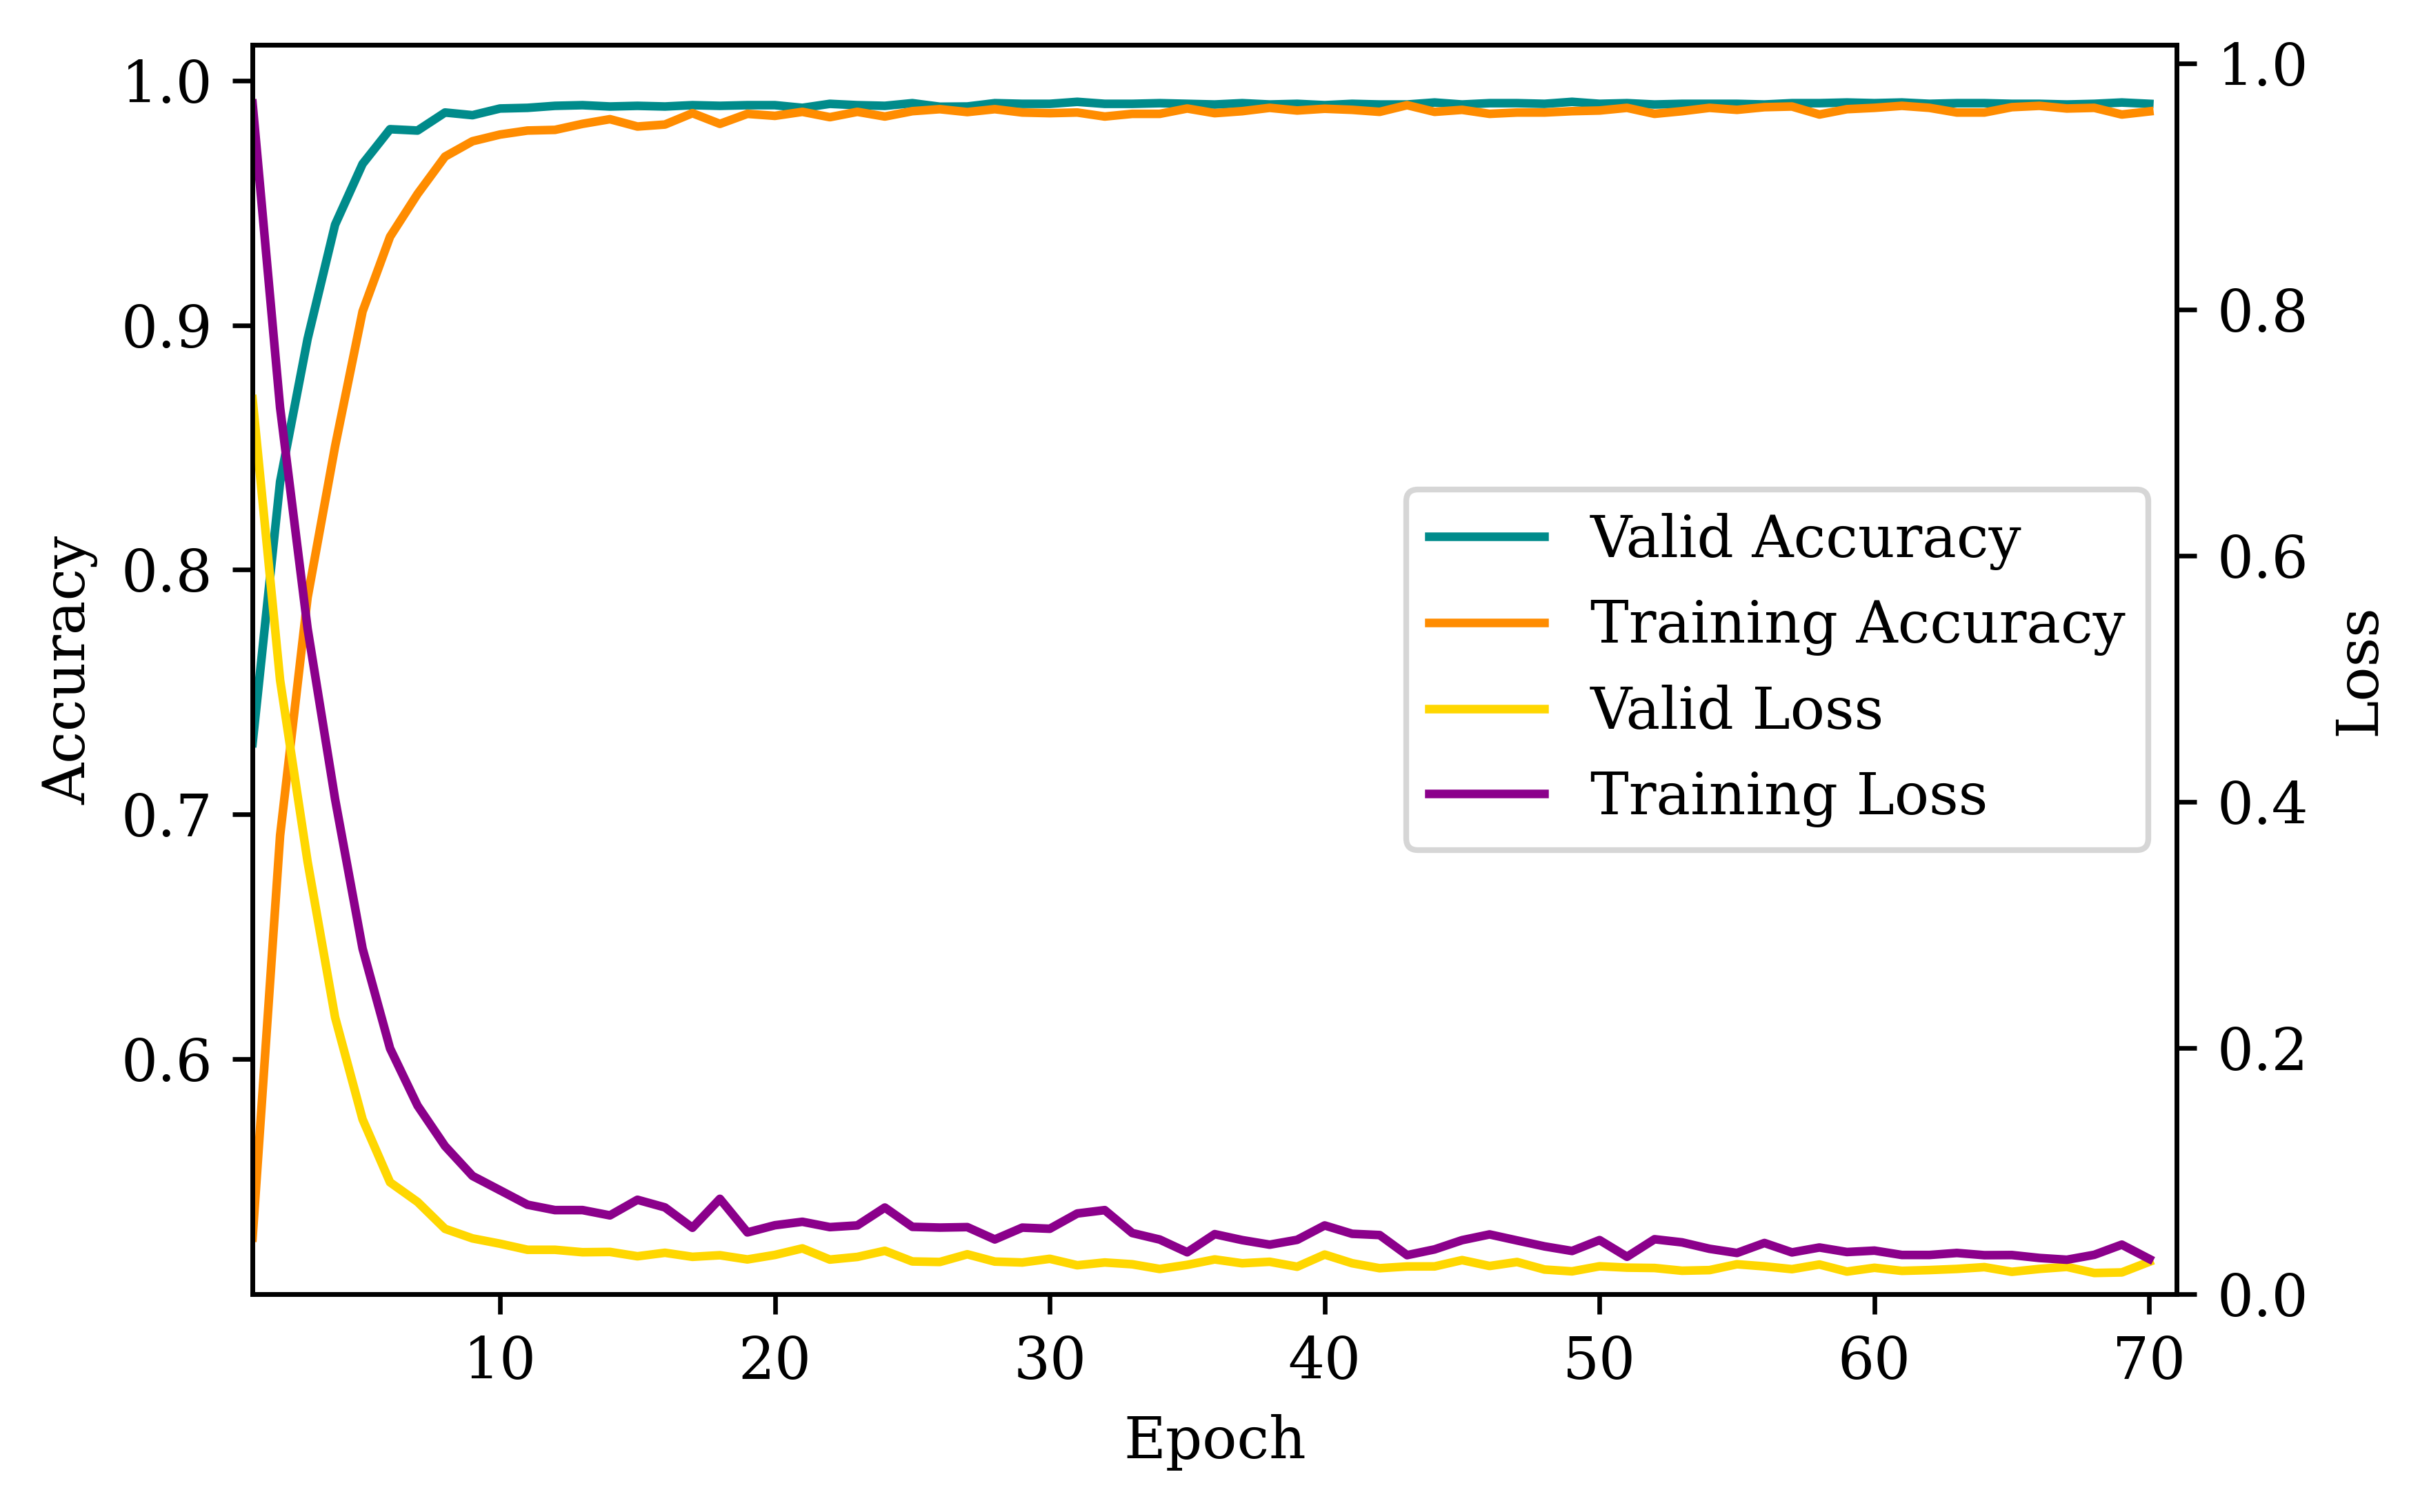

In [40]:
plt.figure(dpi=600)
plt.rcParams['font.family']='serif'
import matplotlib.pyplot as plt
fig=plt.figure(dpi=600)
ax1 = fig.add_subplot(111)
l1 = ax1.plot(range(1,len(valid_acc_list)+1), valid_acc_list, 'darkcyan', label='Valid Accuracy')
l2 = ax1.plot(range(1,len(train_acc_list)+1), train_acc_list, 'darkorange', label='Training Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
# ax1.set_title("...")

ax2 = ax1.twinx()  # this is the important function
l3 = ax2.plot(range(1,len(valid_loss_list)+1), valid_loss_list, 'gold', label='Valid Loss')
l4 = ax2.plot(range(1,len(train_loss_list)+1), train_loss_list, 'darkmagenta', label='Training Loss')
ax2.set_xlim(left=1, right=71)
ax2.set_ylim(0, )
ax2.set_ylabel('Loss')
# ax2.set_xlabel('Same X for both exp(-x) and ln(x)')

lns = l1 + l2 + l3 + l4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='center right')
plt.savefig('figure.jpg')
plt.show()